In [0]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import math

# Métodos Iterativos

## Teste de Parada

In [0]:
def testeDeParada(A, i):
    x = []
    if (i == 0): 
        return 1
    else:
        for j in range(len(A[i])): 
            x.append(abs(A[i,j] - A[i-1,j]))
        d_k = max(x)
        dr_k = d_k/max(A[i])
        return dr_k

## Critério de Convergência

In [15]:
def verifyConvergence(A):
    n = len(A)
    i = 0
    for line in A:
        #Para cada linha:
        diagonal_value = line[i]
        sum_row = sum([abs(number) for number in line])-diagonal_value
        i+=1
        
        if diagonal_value <= sum_row: 
            return False
    return True

A = np.array([[10,2,1],[1,5,1],[2,3,10]], dtype='float')
verifyConvergence(A)

True

## Método de Gauss-Jacobi

In [0]:
# def - a partir da matriz A e b escreva a matrix de acordo com o esquema de Jacobi

In [17]:
# Método de eliminação:
def jacobiMethod(n_iters, A, b, x):
    diagonal = extract_diagonal(A)
    R = A - np.diagflat(diagonal)
    for i in range(n_iters):
        x = (b - np.dot(R,x))/ diagonal
        print("Iteration",i,x)
    return x

A = np.array([[10,-1,2,0],[-1,11,-1,3],[2,-1,10,-1],[0,3,-1,8]], dtype='float')
b = np.array([6,25,-11,15], dtype='float')
x = np.array([0,0,0,0], dtype='float')
n = 20

jacobiMethod(n, A, b, x)
print("Solução exata via numpy:",np.linalg.solve(A,b))

Iteration 0 [ 0.6         2.27272727 -1.1         1.875     ]
Iteration 1 [ 1.04727273  1.71590909 -0.80522727  0.88522727]
Iteration 2 [ 0.93263636  2.05330579 -1.04934091  1.13088068]
Iteration 3 [ 1.01519876  1.95369576 -0.96810863  0.97384272]
Iteration 4 [ 0.9889913   2.01141473 -1.0102859   1.02135051]
Iteration 5 [ 1.00319865  1.99224126 -0.99452174  0.99443374]
Iteration 6 [ 0.99812847  2.00230688 -1.00197223  1.00359431]
Iteration 7 [ 1.00062513  1.9986703  -0.99903558  0.99888839]
Iteration 8 [ 0.99967415  2.00044767 -1.00036916  1.00061919]
Iteration 9 [ 1.0001186   1.99976795 -0.99982814  0.99978598]
Iteration 10 [ 0.99994242  2.00008477 -1.00006833  1.0001085 ]
Iteration 11 [ 1.00002214  1.99995896 -0.99996916  0.99995967]
Iteration 12 [ 0.99998973  2.00001582 -1.00001257  1.00001924]
Iteration 13 [ 1.00000409  1.99999268 -0.99999444  0.9999925 ]
Iteration 14 [ 0.99999816  2.00000292 -1.0000023   1.00000344]
Iteration 15 [ 1.00000075  1.99999868 -0.99999899  0.99999862]
It

## Método de Gauss-Seidel

In [18]:
def gauss_seidel(n_iter,A,b,x):
    n = len(A)
    
    for o in range(n_iter):
        for i in range(n):
            alpha = 0
            for j in range(n):
                if(j != i):
                    alpha = alpha + A[i,j] * x[j]
            x[i] = np.dot(1/A[i,i], b[i] - alpha)
        print("Iteracao",o,x)
    return x

#A = np.array([[3,2,4],[1,1,2],[4,3,-2]], dtype='float')
#b = np.array([1,2,3], dtype='float')
A = np.array([[10,-1,2,0],[-1,11,-1,3],[2,-1,10,-1],[0,3,-1,8]], dtype='float')
b = np.array([6,25,-11,15], dtype='float')
x = np.array([1,1,1,1], dtype='float')
n = 5

gauss_seidel(n,A,b,x)
print("Resultado obtido com numpy:",np.linalg.solve(A,b))

Iteracao 0 [ 0.5         2.13636364 -0.88636364  0.96306818]
Iteracao 1 [ 0.99090909  2.01957645 -0.99991736  0.99266916]
Iteracao 2 [ 1.00194112  2.0021833  -1.00090298  0.99906839]
Iteracao 3 [ 1.00039893  2.00020825 -1.00015212  0.99990289]
Iteracao 4 [ 1.00005125  2.00001731 -1.00001823  0.99999123]
Resultado obtido com numpy: [ 1.  2. -1.  1.]


## Interpretação Geométrica para o método Jacobi

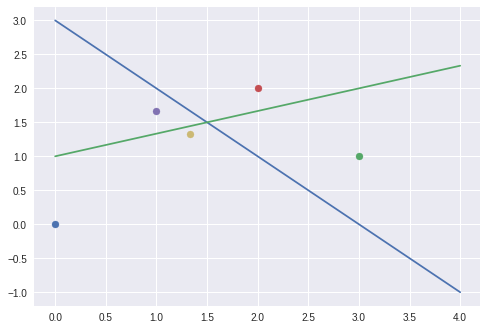

In [19]:
# Método de eliminação:
def jacobi_geometrical(n_iters, A, b, x):
    points = []
    # Lista com as coordenadas das soluções por iteração.
    points.append(x)
    
    diagonal = extract_diagonal(A)
    R = A - np.diagflat(diagonal)
    
    for i in range(n_iters):
        x = (b - np.dot(R,x))/ diagonal
        points.append(x)
        #print("Iteration",i,x)
        #print("points list",points)
    return points

line1 = []
line2 = []

A = np.array([[1,1],[1,-3]], dtype='float')
b = np.array([3,-3], dtype='float')
x = np.array([0,0], dtype='float')
n = 4

points = jacobi_geometrical(n, A, b, x)


for i in range(5):
    plt.scatter(points[i][0],points[i][1])
    
for x1 in range(5):
    line1.append(3 - x1)
    line2.append(1/3 * (3 + x1))

plt.plot(line1)
plt.plot(line2)
plt.show()

## Interpretação para o método Gauss-Seidel (Ajeitar)

[array([0., 0.]), array([3., 0.]), array([3., 2.]), array([1., 2.]), array([1.        , 1.33333333]), array([1.66666667, 1.33333333]), array([1.66666667, 1.55555556]), array([1.44444444, 1.55555556]), array([1.44444444, 1.48148148])]


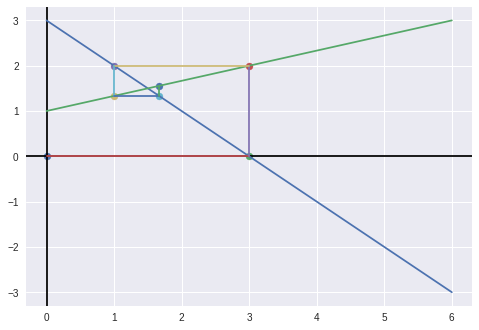

In [133]:
def gauss_seidel_geometrical(n_iter,A,b,x):
    n = len(A)
    y = np.copy(x)
    points = []
    points.append(y)
    
    for o in range(n_iter):
        for i in range(n):
            alpha = 0
            for j in range(n):
                if(j != i):
                    alpha = alpha + A[i,j] * x[j]
            x[i] = np.dot(1/A[i,i], b[i] - alpha)
            y = np.copy(x)
            points.append(y)
    return points


line1 = []
line2 = []

A = np.array([[1,1],[1,-3]], dtype='float')
b = np.array([3,-3], dtype='float')
x = np.array([0,0], dtype='float')
n = 4

points = gauss_seidel_geometrical(n, A, b, x)
print(points)

for i in range(7):
    plt.scatter(points[i][0],points[i][1])
    
    
for x1 in range(7):
    line1.append(3 - x1)
    line2.append(1/3 * (3 + x1))

plt.axvline(x = 0, color = 'black')
plt.axhline(y = 0, color = 'black')
plt.plot(line1)
plt.plot(line2)

plt.plot([0,3],[0,0])
plt.plot([3,3],[0,2])
plt.plot([3,1],[2,2])
plt.plot([1,1],[2,4/3])
plt.plot([1,5/3],[4/3,4/3])
plt.plot([5/3,5/3],[4/3,14/9])
plt.show()


## Atividade

<font size="+2"> Def para o critério de parada. Demonstrar para o Exemplo 1  </font>

In [0]:
A = np.array([[10,-1,2,0],[-1,11,-1,3],[2,-1,10,-1],[0,3,-1,8]], dtype='float')
b = np.array([6,25,-11,15],dtype='float')
x = np.array([0,0,0,0],dtype='float')

jacobiMethod(30,A,b,x)

# Métodos Iterativos de Jacobi

## JacobiMethod

In [0]:
def extract_diagonal(A):
    return [ A[i][i] for i in range(len(A)) ]

def diagonal_matrix_fication(values):
    A = np.zeros((n,n))
    return [A[i][i] == values[i] for i in range(len(values))]
    
def jacobiMethod(n_iters, A, b, x):
    diagonal = extract_diagonal(A)
    R = A - np.diagflat(diagonal)
    for i in range(n_iters):
        x = (b - np.dot(R,x))/ diagonal
        print("Iteration",i,x)
    return x

A = np.array([[10,2,1],[1,5,1],[2,3,10]], dtype='float')
b = np.array([7.,-8.,6.],dtype='float')
x = np.array([0.7,-1.6,0.6],dtype='float')
n = 5

x = jacobiMethod(n, A, b, x)
print("\nO resultado obtido por Jacobi:",x)
print("O resultado obtido pelo numpy:",np.linalg.solve(A, b))

## Critério de Linhas

In [0]:
def verifyConvergence(A):
    n = len(A)
    i = 0
    for line in A:
        #Para cada linha:
        diagonal_value = line[i]
        sum_row = sum([abs(number) for number in line])-diagonal_value
        i+=1
        
        if diagonal_value <= sum_row: 
            return False
    return True

A = np.array([[10.,2.,1.],[1.,5.,1.],[2.,3.,10.]])

verifyConvergence(A)

### Exemplo A

In [0]:
A = np.array([[10,2,1],[1,5,1],[2,3,10]])
verifyConvergence(A)

### Exemplo B

In [0]:
A = np.array([[1,1],[1,-3]], dtype='float')
b = np.array([3,-3], dtype='float') 
x = np.array([3/2,3/2], dtype='float')
n_iters = 10

answer = jacobiMethod(n_iters,A,b,x)

print("O resultado obtido pelo meu def:\n",answer)
print("O resultado obtido pelo linalg.solve:\n",np.linalg.solve(A, b))

if verifyConvergence(A): 
    print("\nA matrix A satisfaz o criterio")
else: 
    print("\nA matriz não segue o criterio das linhas")

### Exemplo C

In [0]:
A = np.array([[1,3,1],[5,2,2],[0,6,8]], dtype='float')
b = np.array([-2,3,-6], dtype='float')
x = [] 
n = 20 

print("Antes da troca de linha:")
print(A)
if verifyConvergence(A): 
    print("\n A matriz obedece o critério")
else: 
    print("\nA matriz não obedece o critério das linhas")
    
A = np.array([[5,2,2],[1,3,1],[0,6,8]], dtype='float')
b = np.array([3.,-2.,-6.], dtype='float')    

print("\n\nApós a troca de linha:")
print(A)
if verifyConvergence(A): 
    print("\n A matriz obedece o critério")
else: 
    print("\nA matriz não obedece o critério das linhas")